In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
#from scipy.stats import uniform, randint

In [3]:

# Veri setini yükleme
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [4]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Modelleri tanımlama
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso())
    ]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
}


Linear Regression modeli eğitiliyor...

Linear Regression Sonuçları:
MSE: 0.5559
RMSE: 0.7456
MAE: 0.5332
R2 Score: 0.5758


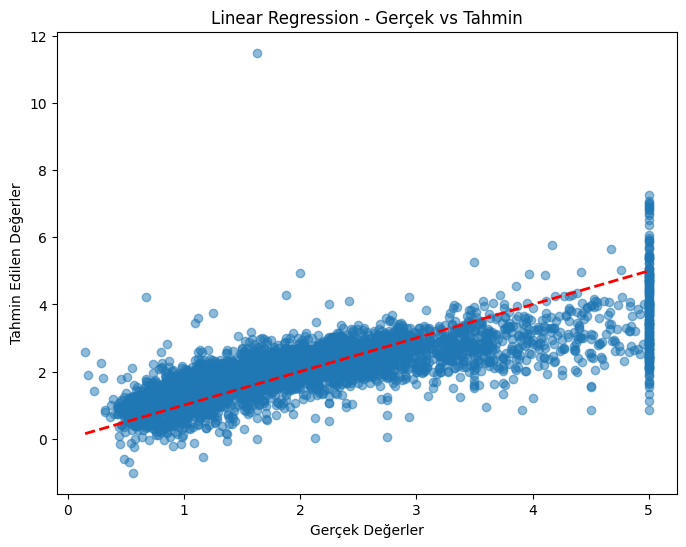


Ridge modeli eğitiliyor...

Ridge Sonuçları:
MSE: 0.5559
RMSE: 0.7456
MAE: 0.5332
R2 Score: 0.5758


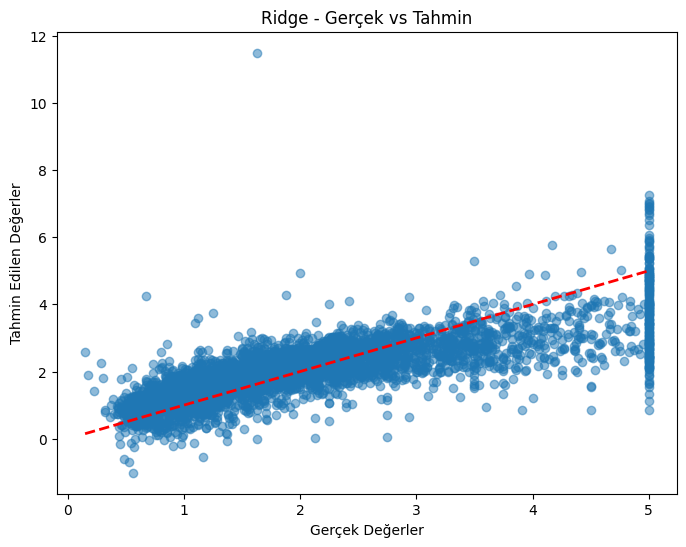


Lasso modeli eğitiliyor...

Lasso Sonuçları:
MSE: 1.3107
RMSE: 1.1449
MAE: 0.9061
R2 Score: -0.0002


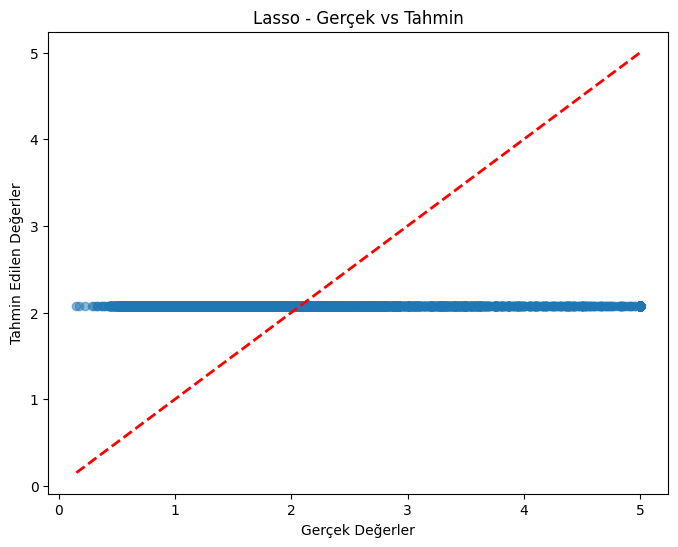


Random Forest modeli eğitiliyor...

Random Forest Sonuçları:
MSE: 0.2554
RMSE: 0.5053
MAE: 0.3275
R2 Score: 0.8051


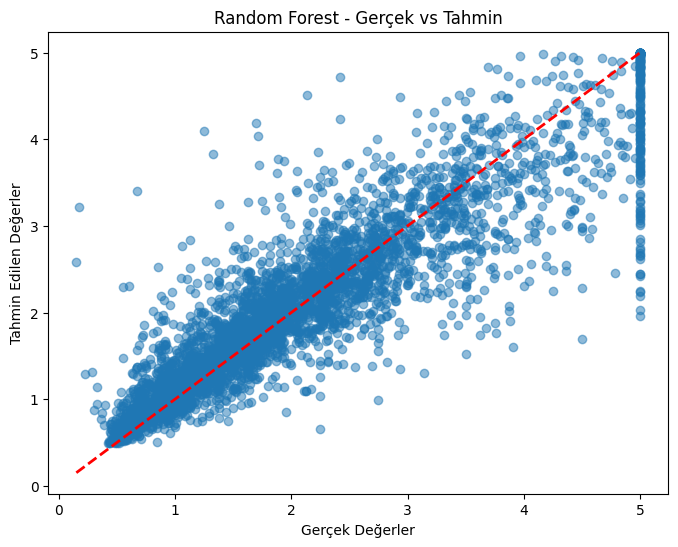


Gradient Boosting modeli eğitiliyor...

Gradient Boosting Sonuçları:
MSE: 0.2940
RMSE: 0.5422
MAE: 0.3716
R2 Score: 0.7756


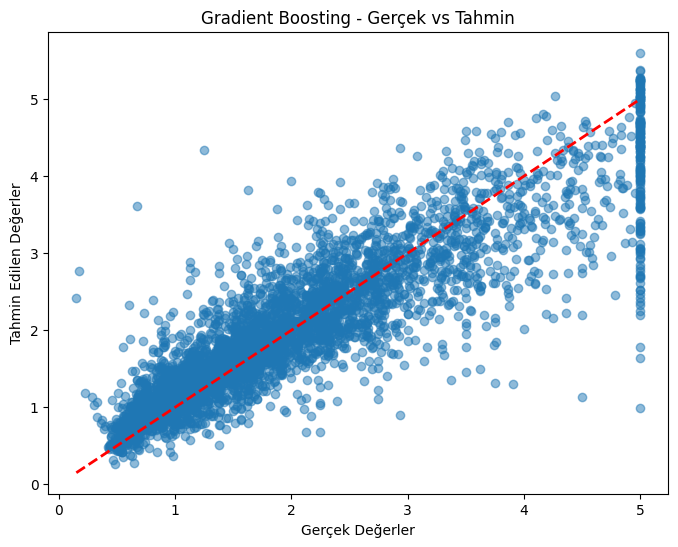


SVR modeli eğitiliyor...

SVR Sonuçları:
MSE: 0.3570
RMSE: 0.5975
MAE: 0.3986
R2 Score: 0.7276


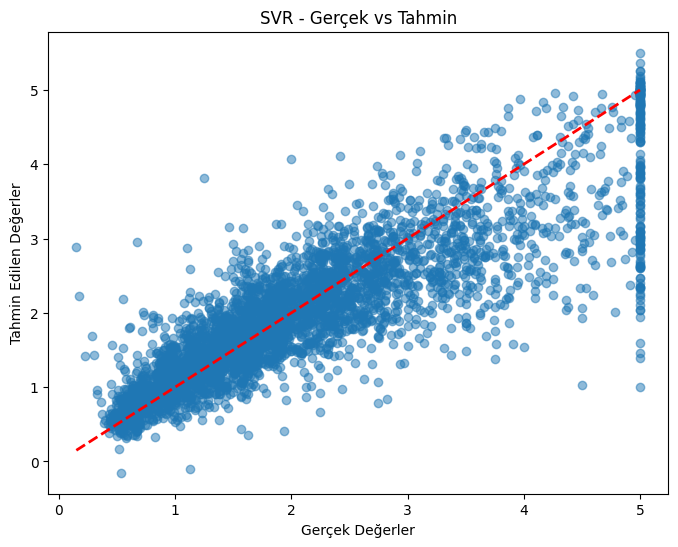

In [6]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"MSE: {results[name]['mse']:.4f}")
    print(f"RMSE: {results[name]['rmse']:.4f}")
    print(f"MAE: {results[name]['mae']:.4f}")
    print(f"R2 Score: {results[name]['r2']:.4f}")

    # Gerçek vs Tahmin grafiği
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.title(f'{name} - Gerçek vs Tahmin')
    plt.show()

In [31]:
# En iyi modeli bulma (R2 skoruna göre)
best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
print("\nTüm modellerin R2 skorları:")
for name, result in results.items():
    print(f"{name}: {result['r2']:.4f}")
print(f"\nEn iyi model: {best_model_name} (R2 Score: {results[best_model_name]['r2']:.4f})")



Tüm modellerin R2 skorları:
Linear Regression: 0.5758
Ridge: 0.5758
Lasso: -0.0002
Random Forest: 0.8051
Gradient Boosting: 0.7756
SVR: 0.7276

En iyi model: Random Forest (R2 Score: 0.8051)


In [39]:
# Linear Regression için hiper parametre optimizasyonu yapmıyoruz
if best_model_name == 'Linear Regression':
    print("\nLinear Regression için hiper parametre optimizasyonu yapılmıyor (parametre yok)")
    best_model = models[best_model_name]
    y_pred = best_model.predict(X_test)
else:
    # En iyi model için hiper parametre optimizasyonu
    print(f"\n{best_model_name} için hiper parametre optimizasyonu yapılıyor...")

    # Hiper parametre dağılımlarını tanımlama
    param_distributions = {
        'Ridge': {
            'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
        },
        'Lasso': {
            'lasso__alpha': [0.1, 1.0, 10.0, 100.0]
        },
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        },
        'SVR': {
            'svr__C': [0.1, 1.0, 10.0],
            'svr__kernel': ['rbf', 'linear'],
            'svr__gamma': ['scale', 'auto']
        }
    }


Random Forest için hiper parametre optimizasyonu yapılıyor...


In [40]:

    # RandomizedSearchCV için model ve parametre dağılımını seçme
    #best_model_name = GradientBoostingRegressor(random_state=42) tekil model denemek için: hiperparametre optimizasyonunda


    model = models[best_model_name]
    param_dist = param_distributions[best_model_name]

In [41]:
# RandomizedSearchCV ile hiper parametre optimizasyonu
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Toplam deneme sayısı
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2,
    error_score='raise'  # Hata durumunda detaylı bilgi almak için
)



In [42]:
# RandomizedSearchCV'yi çalıştırma
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [43]:

# Test seti sonuçlarını yazdırma
print("\nTest seti sonuçları:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


Test seti sonuçları:
MSE: 0.3570
RMSE: 0.5975
MAE: 0.3986
R2 Score: 0.7276


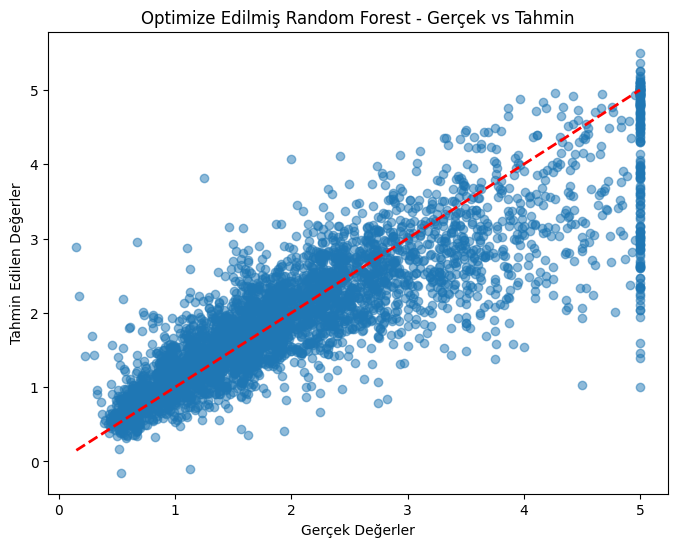

In [44]:
# Gerçek vs Tahmin grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'Optimize Edilmiş {best_model_name} - Gerçek vs Tahmin')
plt.show()

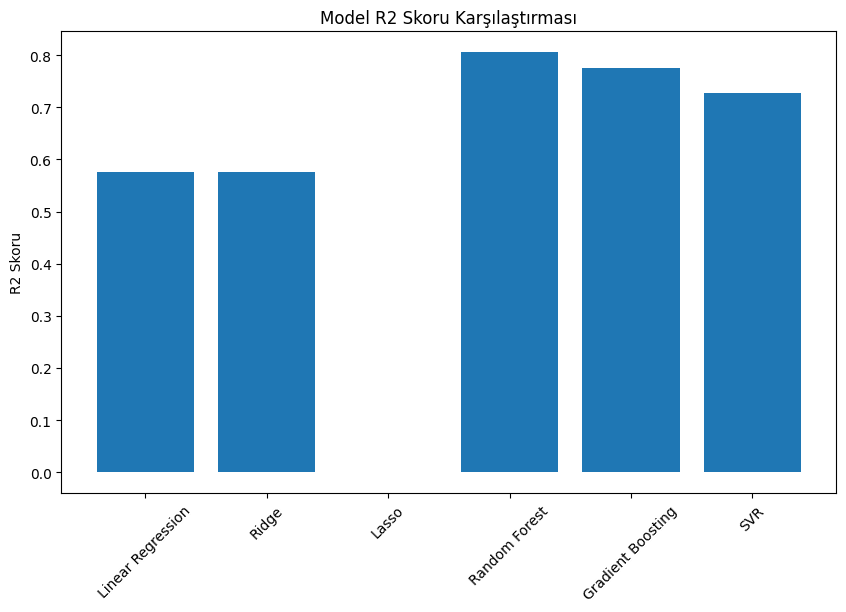

In [45]:
# Tüm modellerin R2 skorlarını karşılaştırma
r2_scores = {name: result['r2'] for name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title('Model R2 Skoru Karşılaştırması')
plt.xticks(rotation=45)
plt.ylabel('R2 Skoru')
plt.show()



## 🎓 Ödev: Pokémon Efsanevi Sınıflandırması (ML Pipeline Projesi)

### 🔍 Amaç:

Bir Pokémon’un istatistiksel özellikleri ve tür bilgilerine göre **efsanevi (legendary)** olup olmadığını sınıflandıracak çeşitli makine öğrenmesi modelleri geliştirin, karşılaştırın ve en iyi modeli optimize edin.

---

## 🔧 1. Kurulum ve Kütüphaneler

* Gerekli Python kütüphanelerini içe aktarın: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, XGBoost, LightGBM, CatBoost.

---

## 📥 2. Veri Yükleme ve İnceleme

*Veri setini yükleyin:


```

url = "https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv"
pokemon_df = pd.read_csv(url)
```


* Veri setinin genel yapısını (`head()`, `info()`, `describe()`) kullanarak keşfedin.
* Hedef değişkeniniz: `Legendary` sütunu.

---

## 🔍 3. Veri Ön İşleme

* Eksik verileri kontrol edin ve gerektiğinde uygun doldurma stratejileri uygulayın.
* Kategorik değişkenleri `LabelEncoder` veya `OneHotEncoder` ile sayısal forma çevirin.
* Aşağıdaki yeni değişkenleri oluşturmayı düşünün:

  * `Total` (istatistiklerin toplamı)
  * `Is_Mono_Type`: Pokémon tek tipe mi sahip?
  * `Attack_Defense_Ratio`: Saldırı / Savunma oranı
* Gereksiz veya çok benzer değişkenleri kaldırın.
* Hedef değişken (`Legendary`) için `LabelEncoder` uygulayın (True → 1, False → 0)

---

## 🔍 4. Veri Setinin Bölünmesi

* Özellikler (X) ve hedef değişken (y) olarak ayırın.
* Eğitim ve test setlerine %80-%20 oranında ayırın.

---

## 🧠 5. Makine Öğrenmesi Modelleri

Aşağıdaki modelleri kullanarak eğitim ve tahmin yapın:

* Random Forest
* Support Vector Machine (SVM) (StandardScaler ile Pipeline içinde)
* k-NN (StandardScaler ile Pipeline içinde)
* XGBoost
* LightGBM
* CatBoost

Her model için:

* Eğitimi gerçekleştirin
* Test seti üzerinde tahmin yapın
* Doğruluk, precision, recall, F1-score metriklerini raporlayın
* Confusion matrix'i görselleştirin

---

## 🏆 6. En Başarılı Modelin Belirlenmesi

* Tüm modellerin doğruluk skorlarını karşılaştırın.
* En iyi performansı gösteren modeli belirleyin.

---

## 🔧 7. Hiperparametre Optimizasyonu (GridSearchCV)

* En iyi modeli seçtikten sonra GridSearchCV kullanarak hiperparametre optimizasyonu yapın.
* Uygun parametre grid’ini tanımlayın.
* `cv=5` ile çapraz doğrulama gerçekleştirin.
* En iyi skor ve parametreleri yazdırın.
* Optimize edilmiş modelle test setinde tekrar tahmin yapın ve metrikleri karşılaştırın.

---

## 📊 8. Sonuçların Karşılaştırılması ve Raporlama

* Tüm modellerin skorlarını çubuk grafikle görselleştirin.
* Hangi model neden daha iyi performans gösterdi? Yorumlayın.
* Özellik önem skorlarını çıkarın (varsa) ve en belirleyici değişkenleri analiz edin.

---

## 🔁 (İsteğe Bağlı) Bonus Görevler

* SMOTE veya benzeri yöntemlerle sınıf dengesizliğini düzeltin ve etkiyi gözlemleyin.
* Modelin tahminlerini `Type1` bazında analiz edin: En çok hata yapılan tür hangisi?

---

## 📁 Teslim Formatı

* Adım adım işlenmiş ve yorumlanmış bir `.ipynb` notebook dosyası.
* Her adımın başında markdown hücreleriyle kısa açıklamalar.
* Görselleştirmeler ve çıktılar eksiksiz olmalı.


